###### Università degli Studi di Milano, Data Science and Economics Master Degree

# LFA
## Linear Function Approximation

### Alfio Ferrara

## Introduction
We have seen how the idea of Value Function Approximation changes the main objective functions of RL. In particular, we have three main solutions for modeling those functions:
1. $V(s) \rightarrow V(s, \mathbf{w})$, suitable for modeling the **state value** function
2. $Q(s, a) \rightarrow Q(s, a, \mathbf{w})$, suitable for any kind of **action space**, including continuous actions
3. $V(s) \rightarrow Q(s, a_1, \mathbf{w}) \dots Q(s, a_n, \mathbf{w})$, suitable for a discrete **action space**

In any case, the point is that we aim at updating $\mathbf{w}$ instead of updating directly the state or state-action values.

This has consequences also in terms of generalization, not only for continuous or huge state spaces.

### Example
Let's suppose to have a problem with three discrete states, $s_1, s_2, s_3$ and that, at time $t$, the values of these states is:

$$
V(S)_t = \begin{matrix} 
s_1 & s_ 2 & s_3 \\
1.5 & 3 & 4.5
\end{matrix}
$$

Now, at time $t+1$, we visit the state $s_2$ and we update its value to $4$, obtaining:

$$
V(S)_t = \begin{matrix} 
s_1 & s_ 2 & s_3 \\
1.5 & 4 & 4.5
\end{matrix}
$$

In the VFA framework instead, let's suppose that the function is modeled as $V(s, \mathbf{w}) = \mathbf{x}(s)\mathbf{w}$, where the state features $\mathbf{x}(s)$ and the parameters at time $t$ are

$$
\mathbf{x}(s) = \begin{bmatrix} 1 \\ 2 \\ 3\end{bmatrix}
$$

$$
\mathbf{w}_t = 1.5 
$$

that corresponds to the same state values that we have seen before:

$$
V(S)_t = \mathbf{x}(s).T \mathbf{w} = \begin{matrix} 
s_1 & s_ 2 & s_3 \\
1.5 & 3 & 4.5
\end{matrix}
$$

Now, when we visit $s_2$ we do not update $V(s_2)$ directly, but we update $\mathbf{w}$ as follows: 

$$
\mathbf{w}_t = 1.5
\rightarrow
\mathbf{w}_{t+1} = 2

$$

When we apply $V(s, \mathbf{w}) = \mathbf{x}(s)^T \mathbf{w}_{t}$, we now obtain:

$$
V(S)_t = \mathbf{x}(s).T \mathbf{w} = \begin{matrix} 
s_1 & s_ 2 & s_3 \\
2.0 & 4.0 & 6.0
\end{matrix}
$$



## Linear Function Approximation
In the Linear FA setting, we define the value function as a **linear combination** of **state features** and **parameters**.

$$
V(s, \mathbf{w}) = \mathbf{x}(s)^T \mathbf{w} = \sum\limits_{i=1}^{n} \mathbf{x}_i(s) \mathbf{w}_i
$$

### Linear parameters do not mean linear features
The state features are extracted by a function $\mathbf{x}(s)$ which does not need to be linear. This makes possible for the agent to have a non-linear perception of the state value.
Let's take an example with a grid environment.

Let's suppose to have a grid $8 \times 8$ where each state is a tile with coordinates $(s_x, s_y)$ and let's suppose that the parameters $\mathbf{w}$ have always value $1$. What happens with these different features:
1. $\mathbf{x}(s) = \begin{bmatrix} s_x & s_y \end{bmatrix}$
2. $\mathbf{x}(s) = \begin{bmatrix} s_x & s_y & \mid s_x - 7 \mid - \mid s_y - 7 \mid \end{bmatrix}$
3. $\mathbf{x}(s) = \begin{bmatrix} s_x & s_y & xy & x^2 & y^2 \end{bmatrix}$

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
f1 = lambda x, y: np.array([x, y])
f2 = lambda x, y: np.array([x, y, np.abs(x-7) - np.abs(y-7)])
f3 = lambda x, y: np.array([x, y, x*y, x**2, y**2])

def V(size, num_features, features):
    w = np.ones(num_features)
    state_values = np.zeros((size, size))
    for x in range(size):
        for y in range(size):
            state_values[x, y] = features(x, y) @ w 
    return state_values

V_1 = V(size=8, num_features=2, features=f1)
V_2 = V(size=8, num_features=3, features=f2)
V_3 = V(size=8, num_features=5, features=f3)

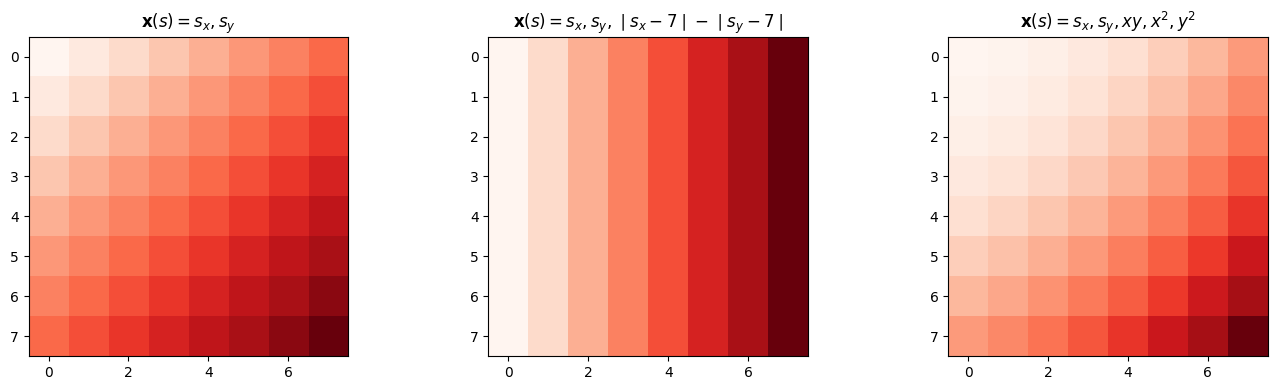

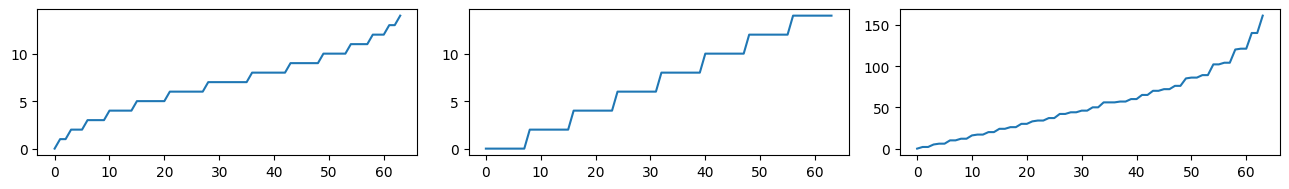

In [75]:
fig, ax = plt.subplots(figsize=(14, 4), ncols=3)
ax[0].imshow(V_1, cmap='Reds')
ax[0].set_title(r"$\mathbf{x}(s) =  s_x, s_y$")
ax[1].imshow(V_2, cmap='Reds')
ax[1].set_title(r"$\mathbf{x}(s) =  s_x , s_y , \mid s_x - 7 \mid - \mid s_y - 7 \mid$")
ax[2].imshow(V_3, cmap='Reds')
ax[2].set_title(r"$\mathbf{x}(s) =  s_x , s_y , xy , x^2 , y^2$")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(13, 2), ncols=3)
ax[0].plot(sorted(V_1.ravel()))
ax[1].plot(sorted(V_2.ravel()))
ax[2].plot(sorted(V_3.ravel()))
plt.tight_layout()
plt.show()

## Learning
In VFA, learning the state value function requires to update the parameters of the function $V(s, \mathbf{w})$. A tool for implementing the learning process is **Gradient Descent**. Given a differentiable function $L(\mathbf{w})$, first we define the gradient of the function as:

$$
\nabla_{\mathbf{w}} L(\mathbf{w}) = \begin{bmatrix}
\frac{\partial L(\mathbf{w})}{\partial \mathbf{w}_1} \\
\dots \\
\frac{\partial L(\mathbf{w})}{\partial \mathbf{w}_n} 
\end{bmatrix}
$$

Then, to find a local minimum of $L(\mathbf{w})$, given a learning reate $\alpha$, we update $\mathbf{w}$ by a quantity $\Delta_{\mathbf{w}}$ defined as:

$$
\Delta_{\mathbf{w}} = - \frac{1}{2} \alpha \nabla_{\mathbf{w}} L(\mathbf{w})
$$

In [78]:
import torch

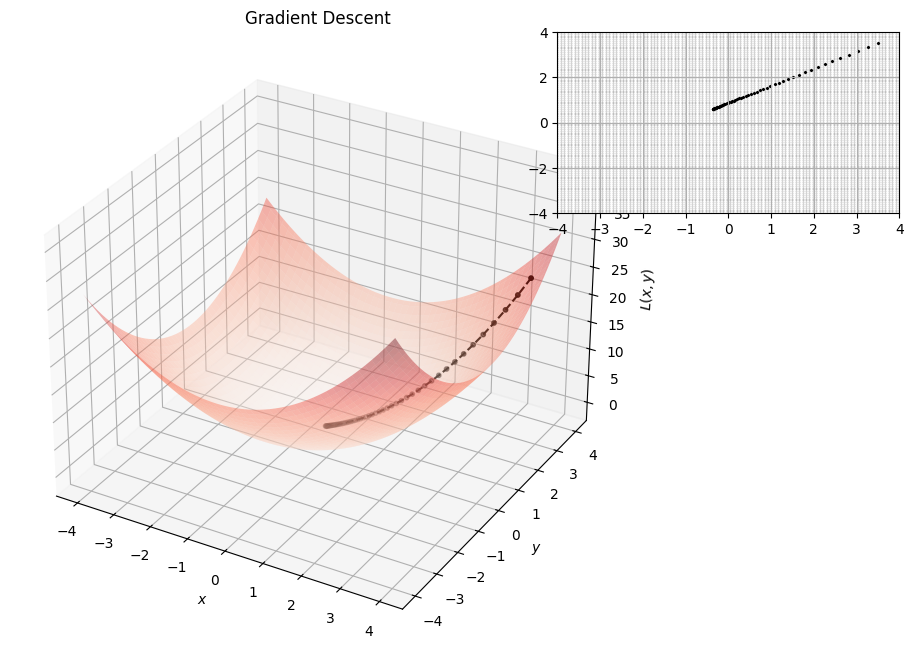

In [128]:
def loss_function(x, y):
    return x**2 + y**2 + (x - y)

x = torch.tensor(3.5, requires_grad=True)
y = torch.tensor(3.5, requires_grad=True)
learning_rate = 0.03
num_steps = 55

x_values = [x.item()]
y_values = [y.item()]
z_values = [loss_function(x, y).item()]

for _ in range(num_steps):
    loss = loss_function(x, y)
    loss.backward()

    with torch.no_grad():
        x -= learning_rate * x.grad
        y -= learning_rate * y.grad

    x.grad.zero_()
    y.grad.zero_()

    x_values.append(x.item())
    y_values.append(y.item())
    z_values.append(loss_function(x, y).item())

x_range = np.linspace(-4, 4, 100)
y_range = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = loss_function(X, Y)

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
jx = fig.add_subplot(333)
jx.scatter(x_values, y_values, color='black', marker='x', s=2)
jx.scatter(X, Y, color='black', s=.2, alpha=.2)
jx.set_xlim((X.min(), X.max()))
jx.set_ylim((Y.min(), Y.max()))
jx.grid(visible=True)

ax.plot_surface(X, Y, Z, cmap="Reds", alpha=0.4)

ax.scatter(x_values, y_values, z_values, color='black', marker='o', s=10)
ax.plot(x_values, y_values, z_values, linestyle="dashed", color='black')

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$L(x, y)$")
ax.set_title("Gradient Descent")
plt.show()

### Define a loss function for VFA
In RL, we do not have a real target that we can use to define the loss, but we can estimate the exppected value of a state. Thus, our loss function is defined as:

$$
L(\mathbf{w}) = \mathbb{E_{\pi}} \left[ (V_{\pi}(s) - \hat{V}(s, \mathbf{w}))^2 \right]
$$

We can find a local minimum of this by gradient descent

$$
\Delta_{\mathbf{w}} = - \frac{1}{2} \alpha \nabla_{\mathbf{w}} L(\mathbf{w}) = \alpha \mathbb{E_{\pi}} \left[ (V_{\pi}(s) - \hat{V}(s, \mathbf{w})) \nabla_{\mathbf{w}} \hat{V}(s, \mathbf{w}) \right]
$$

Instead of evaluating the exptected value of states, we can sample them by **stochastic gradient descent**

$$
\Delta{\mathbf{w}} = \alpha \left( V_{\pi}(s) - \hat{V}(s, \mathbf{w}) \right) \nabla_{\mathbf{w}} \hat{V}(s, \mathbf{w})
$$

In **linear function approximation** this is actually simple

$$
L(\mathbf{w}) = \mathbb{E}_{\pi} \left[ (V_{\pi}(s) - \mathbf{x}(s)^T \mathbf{w})^2 \right]
$$

where $\nabla_{\mathbf{w}}(s, \mathbf{w}) = \mathbf{x}(s)$, leading to:

$$
\Delta_{\mathbf{w}} = \alpha \left( V_{\pi}(s) - \hat{V}(s, \mathbf{w})\right) \mathbf{x}(s)
$$

**Note** that by encoding features as a one-hot vector, we obtain the tabular method.

### Substitute the target with the rewards
In RL, we do not have the true value $V_{\pi}(s)$ of a state, but we can estimate it:

**Montecarlo**
In montecarlo, the target is estimated by the return $G_t$, thus we have:
$$
\Delta_{\mathbf{w}} = \alpha \left(  G_t - \hat{V}(s_t, \mathbf{w})  \right) \nabla \hat{V}(s_t, \mathbf{w})
$$

**Temporal difference**
In $TD(0)$ the target is $r_{t+1} + \gamma \hat{V}(s_{t+1}, \mathbf{w})$, thus we have:

$$
\Delta_{\mathbf{w}} = \alpha \left(  (r_{t+1} + \gamma \hat{V}(s_{t+1}, \mathbf{w})) - \hat{V}(s_t, \mathbf{w})  \right) \nabla \hat{V}(s_t, \mathbf{w})
$$

In $TD(\lambda)$, the target is the $\lambda$ return $G_{t}^{\lambda}$, thus we have:
$$
\Delta_{\mathbf{w}} = \alpha \left(  G_{t}^{\lambda} - \hat{V}(s_t, \mathbf{w})  \right) \nabla \hat{V}(s_t, \mathbf{w})
$$

